# Customer Churn Prediction for a Telecommunication Company
1. The dataset was taken from Kaggle https://www.kaggle.com/datasets/barun2104/telecom-churn

In [2]:
# Importing required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Step 1: Data Collection


In [3]:
df = pd.read_csv('telecom_churn.csv')
df.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [4]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


## Step 2: Data Analysis

<Axes: ylabel='Churn'>

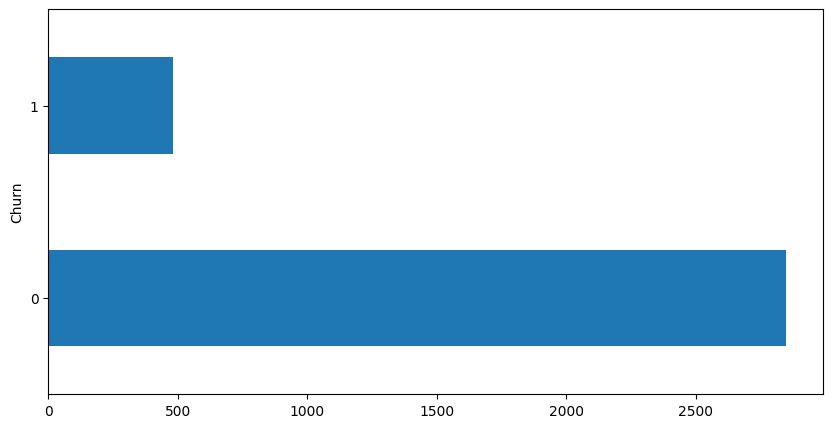

In [5]:
plt.figure(figsize=(10,5))
df['Churn'].value_counts().plot(kind='barh')

## Getting the Box plot 

/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

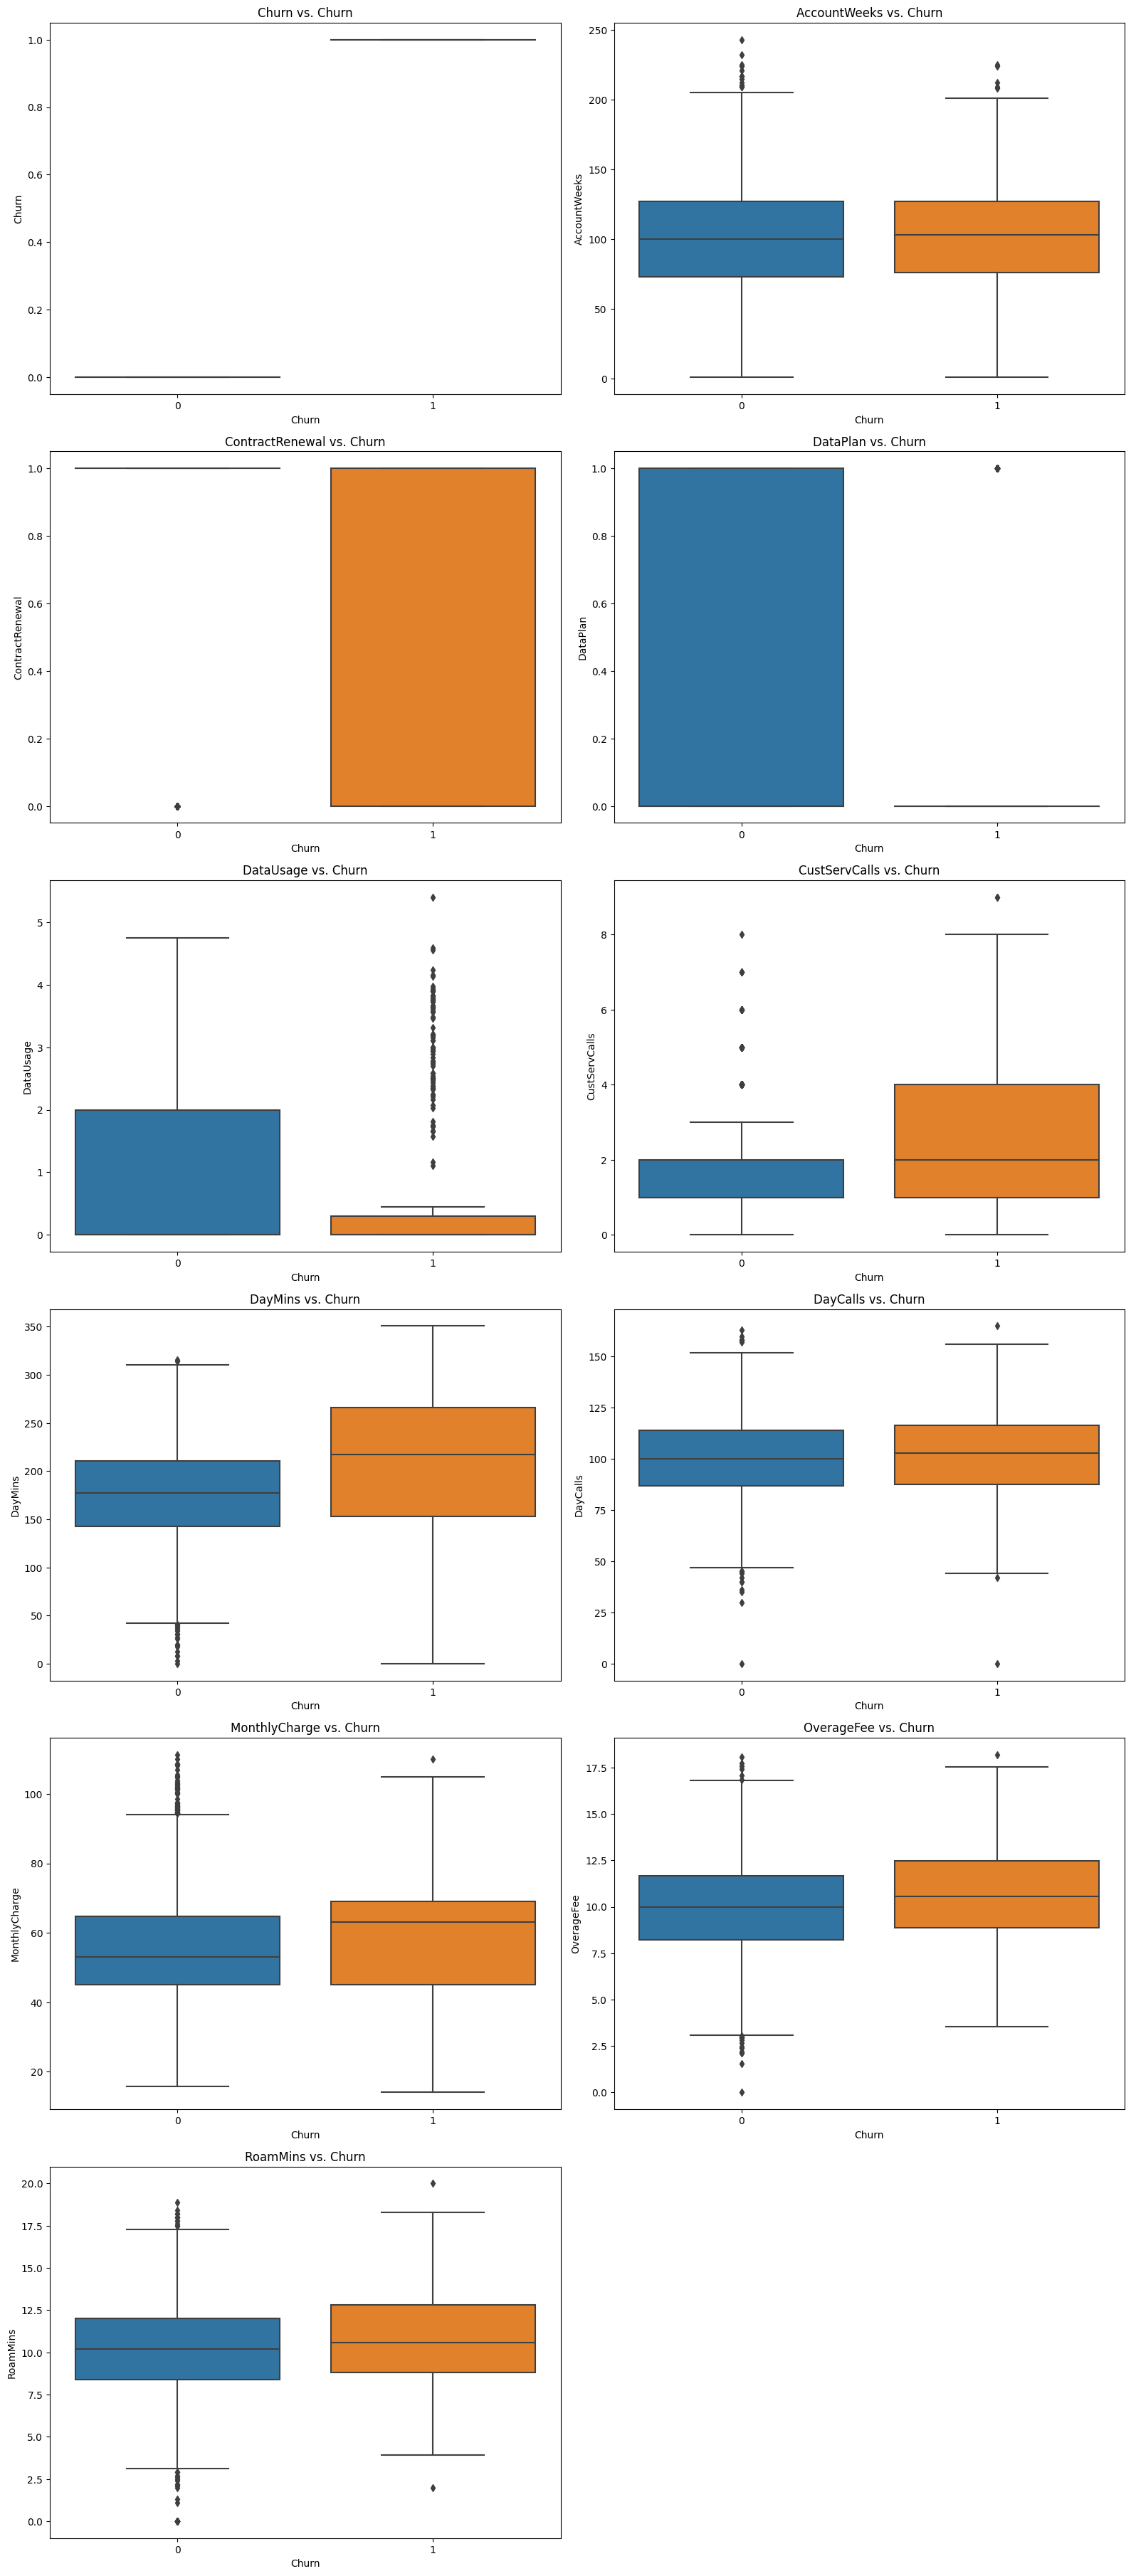

In [6]:
numerical_features = df.select_dtypes(include=["number"]).columns.tolist()
num_rows = len(numerical_features)
num_cols = 2  

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 6 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(numerical_features):
    row, col = divmod(i, num_cols)
    sns.boxplot(x="Churn", y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f"{feature} vs. Churn")
    axes[row, col].set_xlabel("Churn")
    axes[row, col].set_ylabel(feature)


for i in range(len(numerical_features), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])


plt.tight_layout()
plt.show()

# Time for Histogram

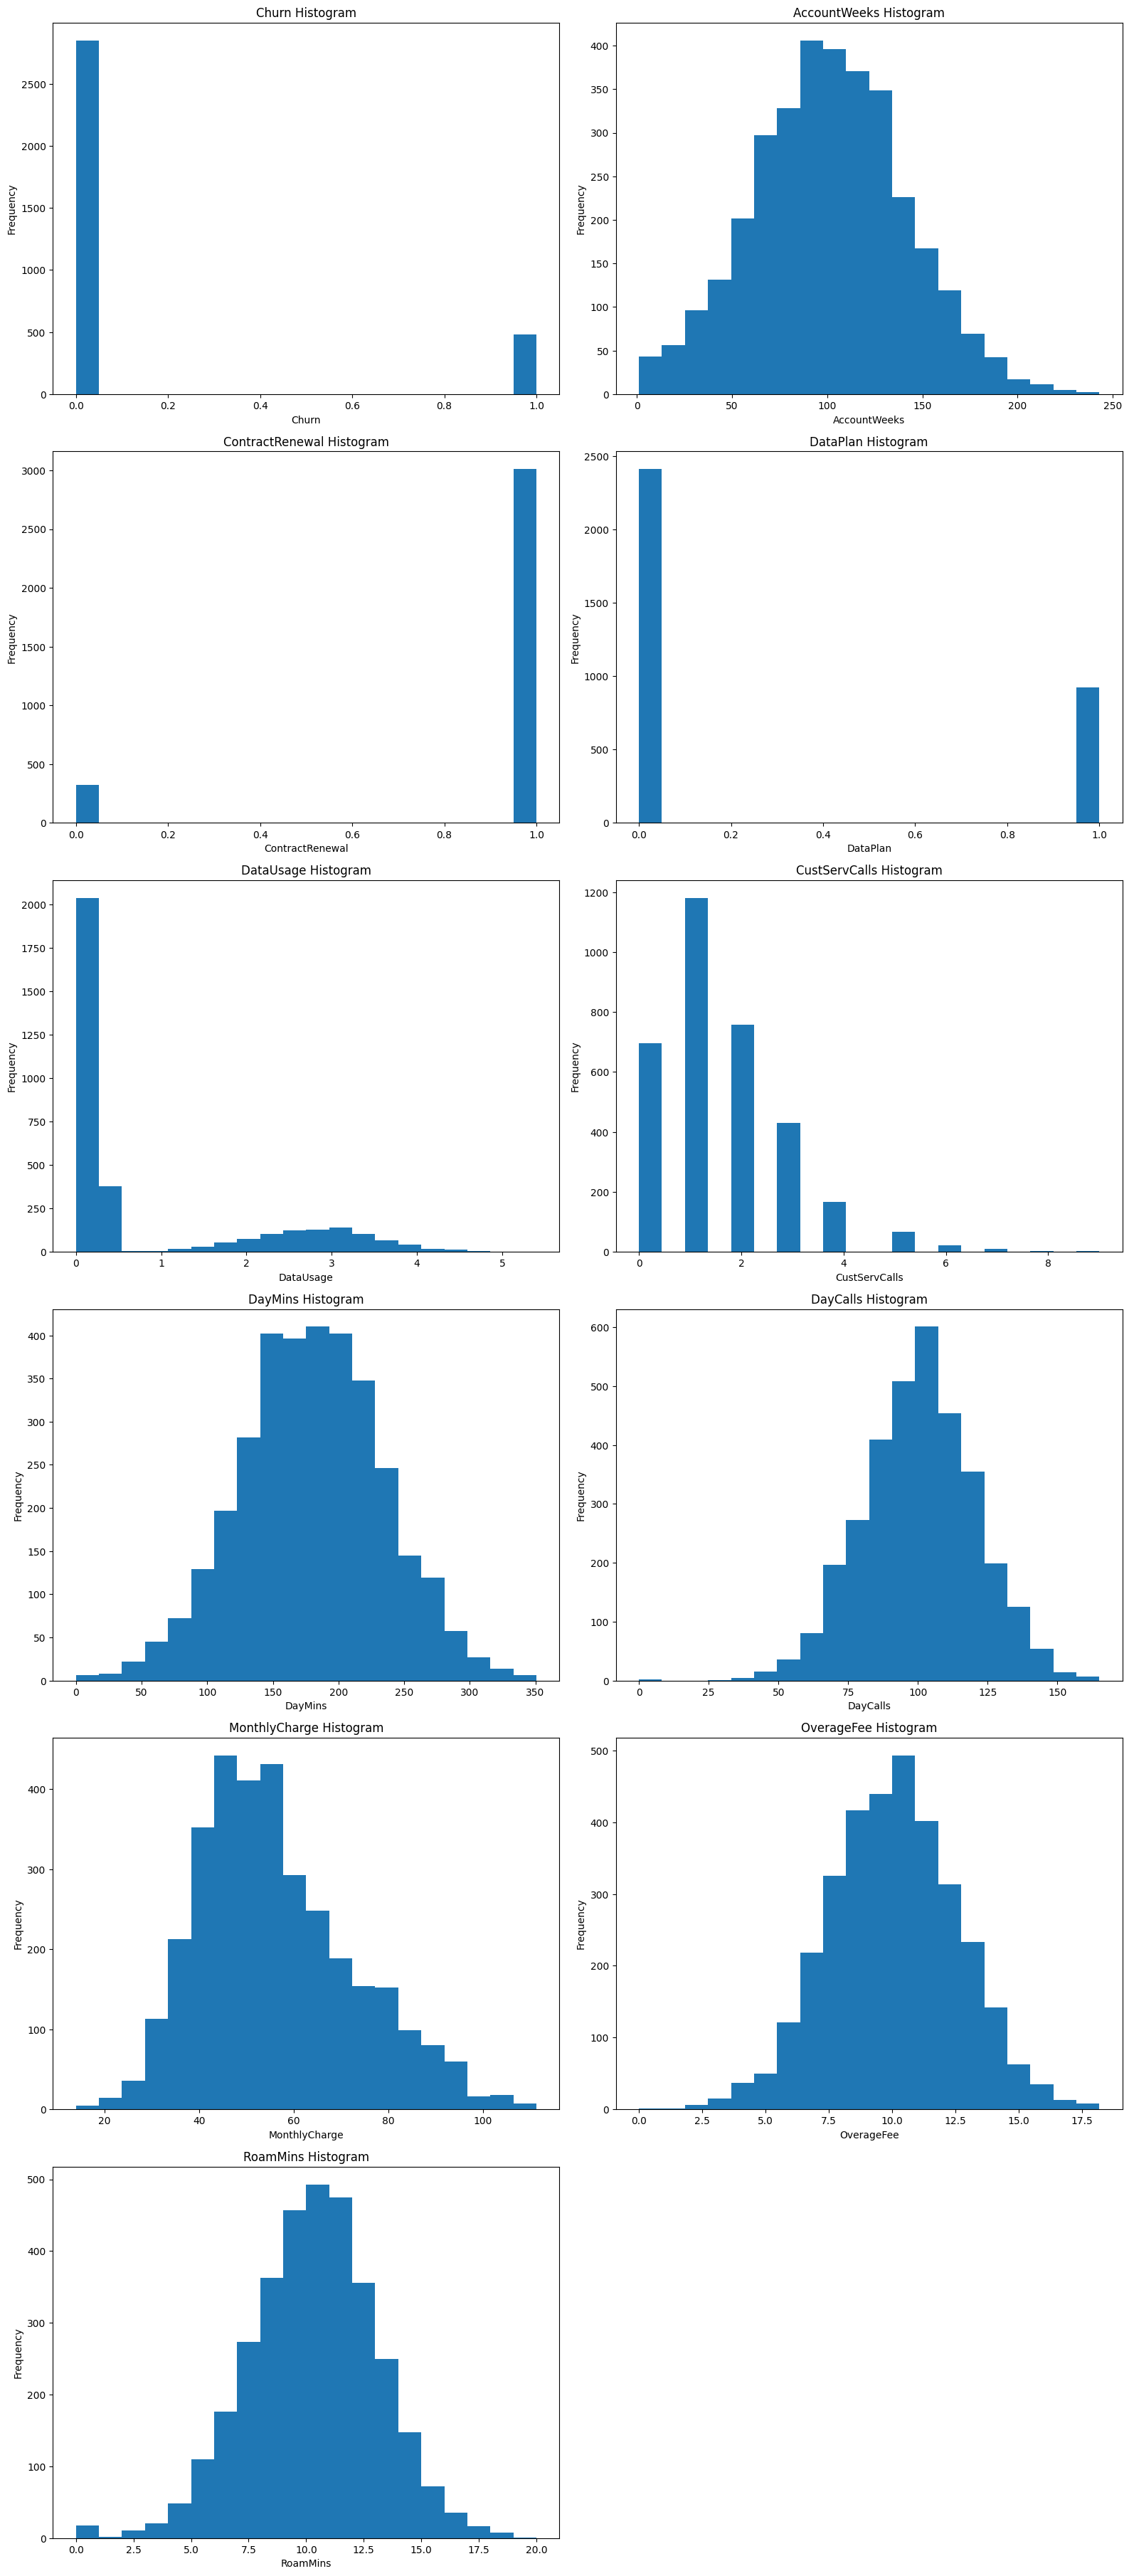

In [7]:
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 6 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Create histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    row, col = divmod(i, num_cols)
    df[feature].plot(kind='hist', bins=20, ax=axs[row, col])
    axs[row, col].set_title(f"{feature} Histogram")
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel("Frequency")

# Remove any empty subplots
for i in range(len(numerical_features), num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

# Show the combined plot
plt.tight_layout()
plt.show()

/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

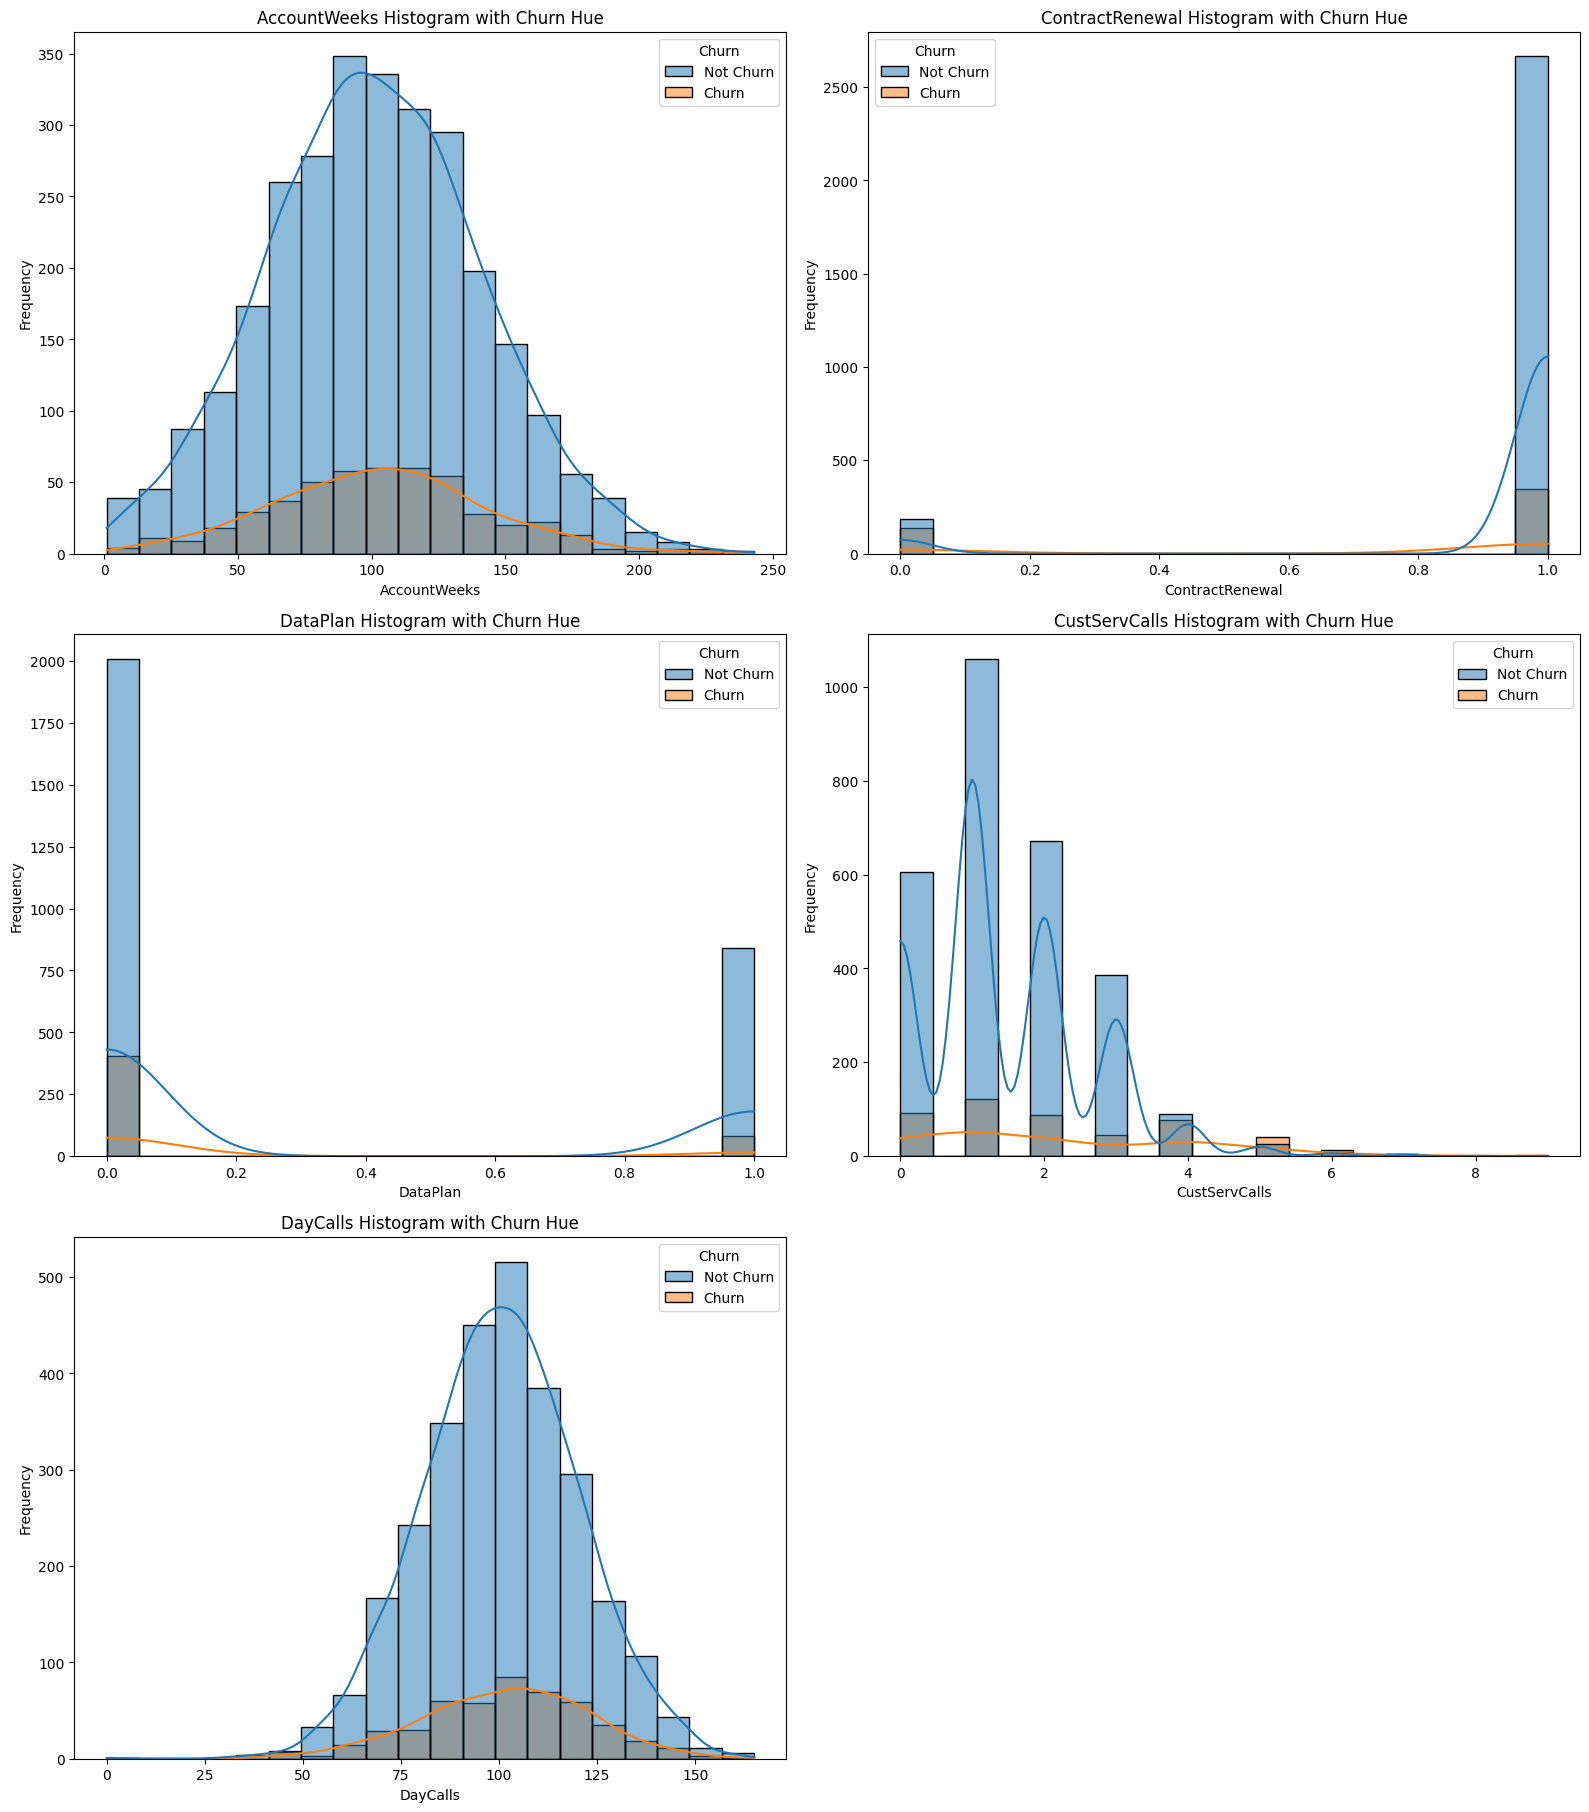

In [8]:
df['Churn'] = df['Churn'].replace({1: 'Churn', 0: 'Not Churn'})
integer_variables = df.select_dtypes(include=["int"]).columns.tolist()

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 6 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Create histograms for each integer variable with "Churn" as hue
for i, variable in enumerate(integer_variables):
    row, col = divmod(i, num_cols)
    sns.histplot(data=df, x=variable, hue="Churn", bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"{variable} Histogram with Churn Hue")
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel("Frequency")

# Remove any empty subplots
for i in range(len(integer_variables), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Show the combined plot
plt.tight_layout()
plt.show()




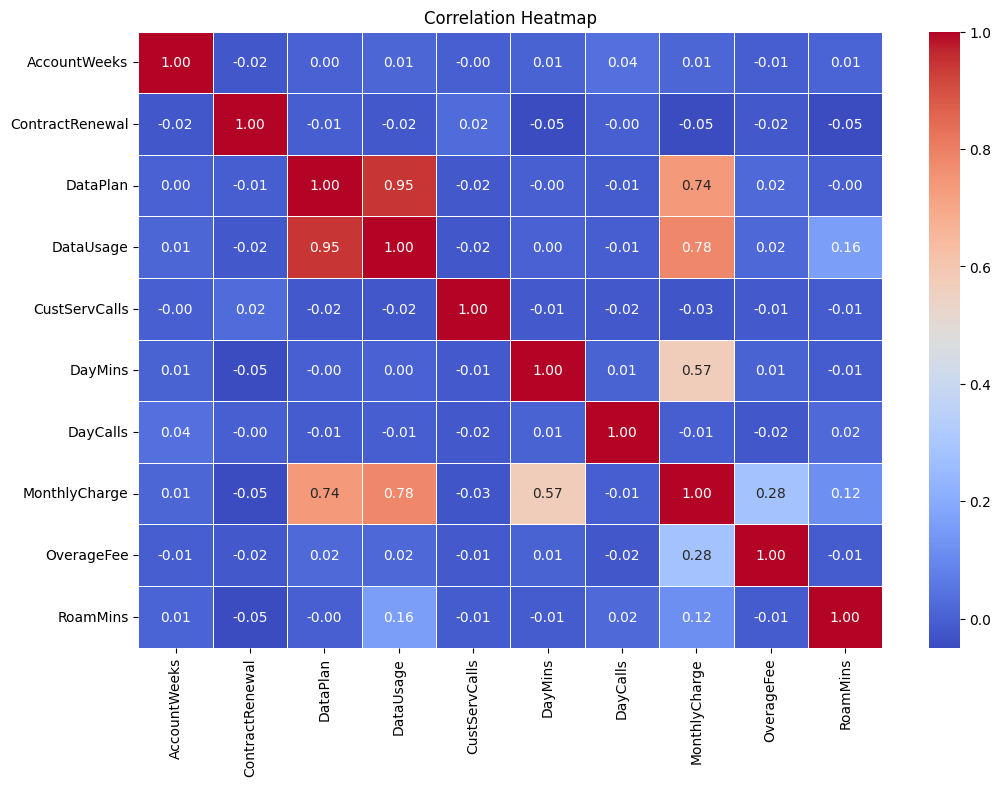

In [9]:
numerical_features = df.select_dtypes(include=["number"])

# Calculate the correlatation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step3: Data Pre-processing 

In [10]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [11]:
df['Churn'] = df['Churn'].replace({'Churn': 1,'Not Churn': 0})
X = df.drop(columns='Churn', axis=1)
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Removing Outlier using Z-Score

In [12]:
feature_names = list(X_train.columns)
z_scores = np.abs(stats.zscore(X_train[feature_names]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [13]:
# Normalizing Data
scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=3, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=3,
                       random_state=0)

In [16]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 90.7 %


In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9070464767616192
Precision Score :  0.9070464767616192
Recall Score :  0.9070464767616192
Jaccard Score :  0.8299039780521262
Log Loss :  3.350384572901444


/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


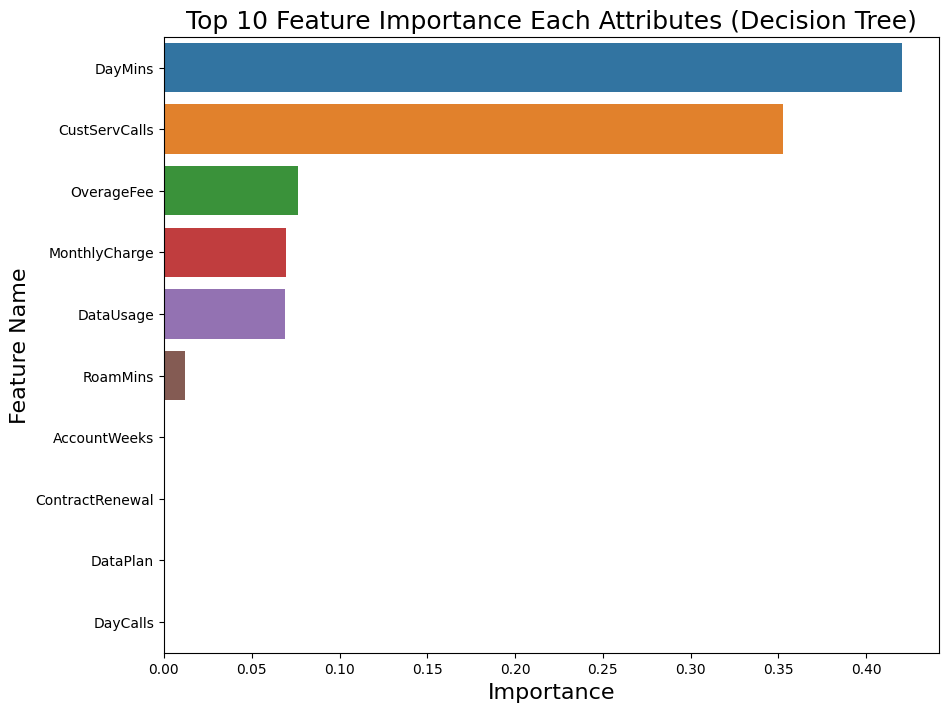

In [18]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.9070464767616192')

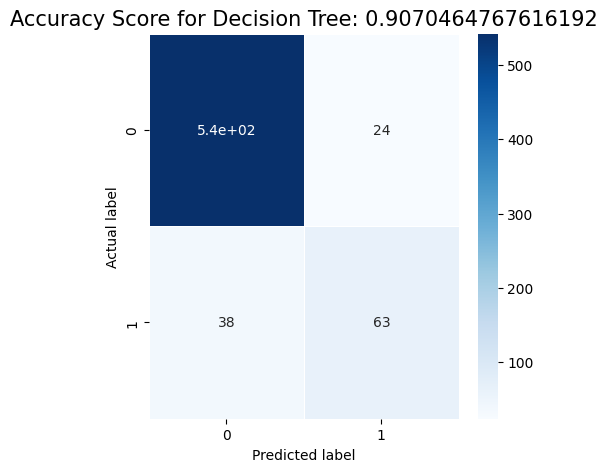

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

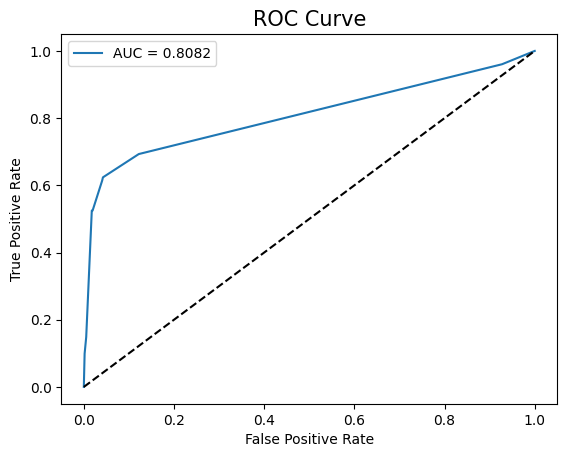

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_regression = LogisticRegression(class_weight='balanced')

# Define the parameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l2', 'none'],  # Only 'l2' or 'none' penalties for 'lbfgs'
    'random_state': [0, 42]
}


# Perform a grid search with cross-validation to find the best hyperparameters for Logistic Regression
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5)
grid_search_lr.fit(X_train_scaled, y_train)  # Assuming X_train_scaled is scaled

# Print the best hyperparameters for Logistic Regression
print(grid_search_lr.best_params_)


/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalt

{'C': 10, 'penalty': 'l2', 'random_state': 0}


In [22]:
logistic_regression = LogisticRegression(class_weight='balanced', random_state=0, penalty='l2', C=1)

logistic_regression.fit(X_train_scaled, y_train)

y_pred = logistic_regression.predict(X_test_scaled)

# Compute evaluation metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the best hyperparameters for Logistic Regression
print("Best Hyperparameters:", grid_search_lr.best_params_)
accuracy_lr = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_lr}')
print("F1 Score:", f1)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("ROC AUC Score:", roc_auc)

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'random_state': 0}
Accuracy: 0.7451274362818591
F1 Score: 0.46202531645569617
Precision Score: 0.3395348837209302
Recall Score: 0.7227722772277227
ROC AUC Score: 0.735944442500787


# XGBoost

In [25]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

# Train the XGBoost model on your training data
xgb_classifier.fit(X_train_scaled, y_train)  # Assuming X_train_scaled is scaled

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_scaled)  # Assuming X_test_scaled is scaled

# Calculate various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy_boost = accuracy
# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


/home/a/anaconda3/envs/torch/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Accuracy: 0.9160419790104948
Precision: 0.8813559322033898
Recall: 0.5148514851485149
F1 Score: 0.6500000000000001
ROC AUC Score: 0.7512419969912185
Confusion Matrix:
 [[559   7]
 [ 49  52]]


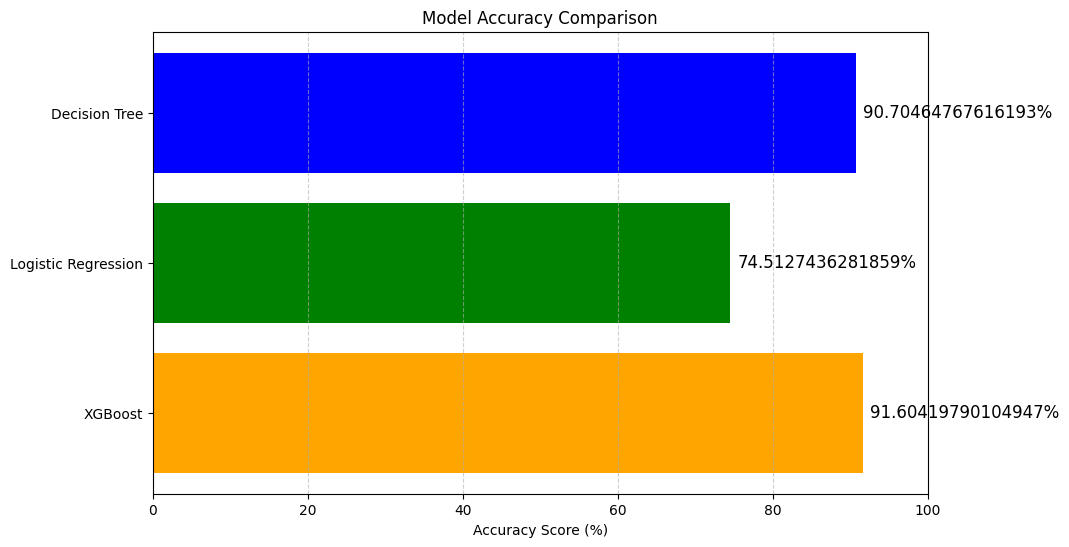

In [ ]:
# List of model names and their respective accuracy scores
model_names = ['Decision Tree', 'Logistic Regression', 'XGBoost']
accuracy_scores = [accuracy_dtree*100, accuracy_lr* 100, accuracy_boost* 100]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Accuracy Score (%)')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 100)  # Set the x-axis limits from 0% to 100%
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest accuracy at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add gridlines to the x-axis for reference

# Display the accuracy scores as text on the bars
for i, score in enumerate(accuracy_scores):
    plt.text(score + 1, i, f'{score}%', va='center', fontsize=12)

# Show the plot
plt.show()